<a href="https://colab.research.google.com/github/FelipeGonzalezGarrido/Coding-Dojo/blob/main/3.%20Advanced%20Machine%20Learning/Semana%203%20-%20Introduction%20to%20Deep%20Learning/Semana_3_Ejercicio_simple_de_redes_neuranels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En esta asignación crearás una red simple utilizando capas densas.  También crearás 2 más versiones de eso cuando ajustes el número de capas y neuronas por capa para ver si puede lograr un mejor rendimiento.

Tarea: Crear un modelo de aprendizaje profundo para predecir la enfermedad cardíaca en poblaciones de riesgo.  
TAREA: Utilizar una red neuronal para predecir la enfermedad cardíaca usando los datos determinados.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTRfoQAojPwNsw33zUSpBg32DuK2z0WvLPptGOncIXa38tN3RWk9puvelcmsIIhFb_XF12RD7PdqCwf/pub?output=csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.duplicated().sum()

0

In [6]:
X = df.drop(columns="HeartDisease")

y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [7]:
scaler = StandardScaler()

ohe = OneHotEncoder()

In [8]:
cat_selector = make_column_selector(dtype_include="object")
num_selector = make_column_selector(dtype_include="number")

In [9]:
cat_tuple = (ohe, cat_selector)
num_tuple = (scaler, num_selector)

In [10]:
preprocessor = make_column_transformer(num_tuple, cat_tuple)

In [11]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd706c08100>),
                                ('onehotencoder', OneHotEncoder(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd79022bb50>)])

In [12]:
X_train_processed = preprocessor.transform(X_train)

X_test_processed = preprocessor.transform(X_test)

Aplicacion de redes neuronales

In [13]:
input_shape = X_train_processed.shape[1]
input_shape

20

In [14]:
model = Sequential()

In [15]:
# First hidden layer
model.add(Dense(20, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?

In [16]:
# Output layer
model.add(Dense(1, activation = 'sigmoid'))

In [17]:
model.compile(loss = 'bce', optimizer = 'adam')

In [19]:
history = model.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test), 
                    epochs=50)

Epoch 1/50
22/22 [==============================] - 0s 22ms/step - loss: 0.2840 - val_loss: 0.3447
Epoch 2/50
22/22 [==============================] - 0s 15ms/step - loss: 0.2824 - val_loss: 0.3435
Epoch 3/50
22/22 [==============================] - 0s 12ms/step - loss: 0.2796 - val_loss: 0.3449
Epoch 4/50
22/22 [==============================] - 0s 14ms/step - loss: 0.2792 - val_loss: 0.3440
Epoch 5/50
22/22 [==============================] - 0s 9ms/step - loss: 0.2776 - val_loss: 0.3480
Epoch 6/50
22/22 [==============================] - 0s 19ms/step - loss: 0.2759 - val_loss: 0.3484
Epoch 7/50
22/22 [==============================] - 0s 10ms/step - loss: 0.2733 - val_loss: 0.3476
Epoch 8/50
22/22 [==============================] - 1s 27ms/step - loss: 0.2719 - val_loss: 0.3482
Epoch 9/50
22/22 [==============================] - 0s 15ms/step - loss: 0.2704 - val_loss: 0.3466
Epoch 10/50
22/22 [==============================] - 0s 15ms/step - loss: 0.2697 - val_loss: 0.3458
Epoch 11/5

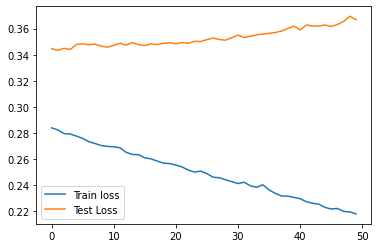

In [20]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

Segunda configuracion

In [21]:
# First hidden layer
model.add(Dense(30, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(15, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
# Output layer
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
history = model.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test), 
                    epochs=20)


Epoch 1/20
22/22 [==============================] - 2s 13ms/step - loss: 0.6560 - val_loss: 0.6450
Epoch 2/20
22/22 [==============================] - 0s 5ms/step - loss: 0.6168 - val_loss: 0.6129
Epoch 3/20
22/22 [==============================] - 0s 6ms/step - loss: 0.5787 - val_loss: 0.5822
Epoch 4/20
22/22 [==============================] - 0s 6ms/step - loss: 0.5404 - val_loss: 0.5491
Epoch 5/20
22/22 [==============================] - 0s 7ms/step - loss: 0.5001 - val_loss: 0.5161
Epoch 6/20
22/22 [==============================] - 0s 5ms/step - loss: 0.4598 - val_loss: 0.4852
Epoch 7/20
22/22 [==============================] - 0s 7ms/step - loss: 0.4230 - val_loss: 0.4589
Epoch 8/20
22/22 [==============================] - 0s 7ms/step - loss: 0.3877 - val_loss: 0.4349
Epoch 9/20
22/22 [==============================] - 0s 6ms/step - loss: 0.3560 - val_loss: 0.4168
Epoch 10/20
22/22 [==============================] - 0s 5ms/step - loss: 0.3305 - val_loss: 0.4037
Epoch 11/20
22/22 

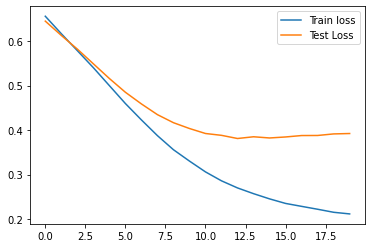

In [22]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [23]:
# First hidden layer
model.add(Dense(50, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(20, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
# Output layer
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
history = model.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test), 
                    epochs=10)


Epoch 1/10
22/22 [==============================] - 2s 15ms/step - loss: 0.6598 - val_loss: 0.6467
Epoch 2/10
22/22 [==============================] - 0s 7ms/step - loss: 0.6152 - val_loss: 0.6207
Epoch 3/10
22/22 [==============================] - 0s 6ms/step - loss: 0.5780 - val_loss: 0.5911
Epoch 4/10
22/22 [==============================] - 0s 6ms/step - loss: 0.5362 - val_loss: 0.5610
Epoch 5/10
22/22 [==============================] - 0s 6ms/step - loss: 0.4884 - val_loss: 0.5296
Epoch 6/10
22/22 [==============================] - 0s 5ms/step - loss: 0.4504 - val_loss: 0.5152
Epoch 7/10
22/22 [==============================] - 0s 6ms/step - loss: 0.4174 - val_loss: 0.5030
Epoch 8/10
22/22 [==============================] - 0s 5ms/step - loss: 0.3946 - val_loss: 0.4853
Epoch 9/10
22/22 [==============================] - 0s 6ms/step - loss: 0.3807 - val_loss: 0.4857
Epoch 10/10
22/22 [==============================] - 0s 6ms/step - loss: 0.3650 - val_loss: 0.4972


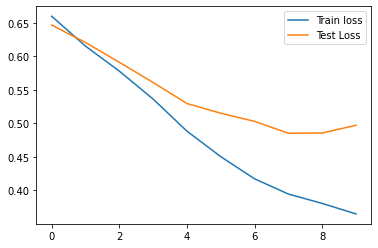

In [24]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();